
# Pairwise correlations between all positional features and experimental enrichment scores

In [1]:
#import packages
from Bio import SeqIO
import numpy as np
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt
from utils.plotting import *
from utils.processing import *

# set styles
plt.style.use('./utils/domain_ins.mplstyle')
plt.rcParams['svg.fonttype'] = 'none'

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


### Import data
* requires datasets from notebook #2

In [2]:
# define dirs
base = '/work/projects/project01640/jm/domain_insertion/DI_screen'
in_folder = f'{base}/analysis/input_data'
data_folder = f'{base}/analysis/output_datasets'
fig_folder = f'{base}/analysis/figures'
fasta_sequences = {rec.id : rec.seq for rec in SeqIO.parse(f'{in_folder}/proteins.fasta', 'fasta')}

# import data
with open(f'{data_folder}/proteins_training.pickle', 'rb') as input:
    full_dataset = pickle.load(input)
input.close()

with open(f'{data_folder}/analysis_dict.pickle', 'rb') as input:
    analysis_dict = pickle.load(input)
input.close()


#create uniprot dict
uniprot_dict = {'AraC':'AraC', 'TVMV':'TVMV', 'T7':'WP_001092355.1', 'Flp':'Flp', 'SigF':'SigF'}

### Calculate correlations

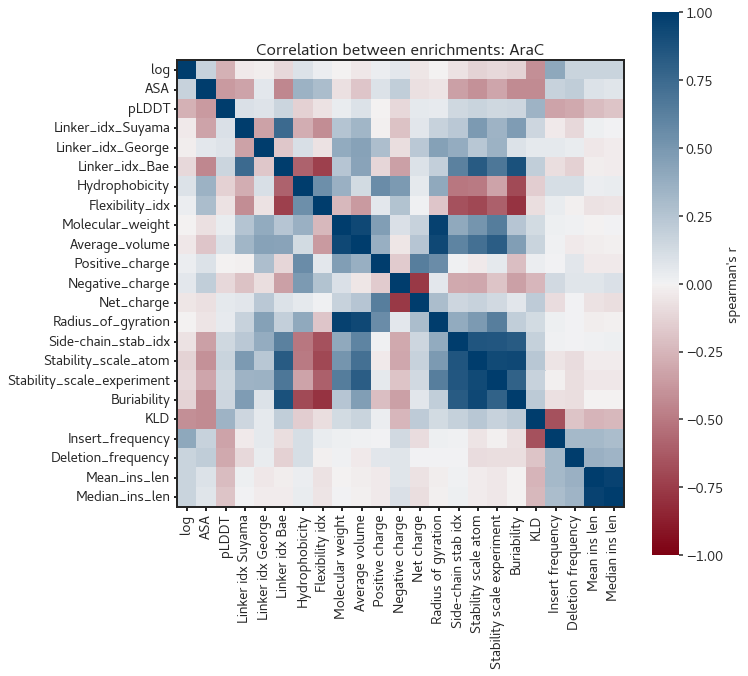

In [3]:
for name, radius_dict in full_dataset.items():
    for name, df in radius_dict.items():
        df.dropna(inplace=True)

pairwise_correlation(full_dataset['AraC']['2'], 'AraC', fig_folder, method='spearman')

In [4]:
for insert in ['LOV', 'UniRapR', 'eYFP', 'ERD']:
    full_dataset[f'AraC_{insert}'] = {}
    full_dataset[f'AraC_{insert}']['2'] = full_dataset[f'AraC']['2'].copy()
    enrichments = (analysis_dict[f'AraC_{insert}']['12']['log'] + analysis_dict[f'AraC_{insert}']['22']['log'])/2
    full_dataset[f'AraC_{insert}']['2']['log'] = enrichments.reset_index(drop=True)

-0.5076570343648872 0.5316409701770101
-0.12699396039425315 0.4152047354667678
-0.23421141151968278 0.2202553686768086
-0.1580197824149129 0.19745921575798586
-0.40983540858275375 0.4068951319016704
-0.09329176764176061 0.19170655092566216
-0.17053409988818902 0.10047783079660431
-0.28879532183852824 0.14943591055166086


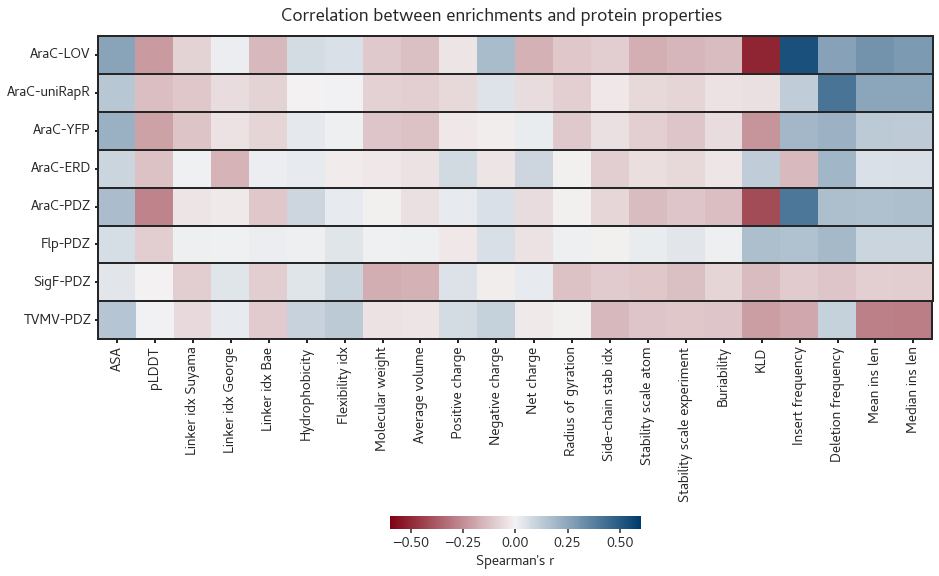

In [5]:
# define subplot grid
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(15, 8), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 1, 1, 6.66]})
plt.subplots_adjust(hspace=0, top=.9, bottom=0)
fig.suptitle("Correlation between enrichments and protein properties", fontsize=18, y=0.95)

variants = ['AraC_LOV', 'AraC_UniRapR', 'AraC_eYFP', 'AraC_ERD', 'AraC', 'Flp', 'SigF', 'TVMV']
plots = range(len(variants))
names = ['AraC-LOV', 'AraC-uniRapR', 'AraC-YFP', 'AraC-ERD', 'AraC-PDZ', 'Flp-PDZ', 'SigF-PDZ', 'TVMV-PDZ']

for variant, ax, number, name in zip(variants, axs.ravel(), plots, names):
    data = full_dataset[variant]['2'].corr(method='spearman').iloc[0,1:]
    data_array = np.array(data).reshape(1,len(data))
    print(np.min(data_array), np.max(data_array))
    if number == 7:
        sns.heatmap(data=data_array, cmap=map, cbar_kws={'label': f"Spearman's r", 'shrink':.3, 'orientation':'horizontal', 'pad':0.7}, square=True, vmin=-.6, vmax=.6, ax=ax)
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(2)
        ax.yaxis.set_tick_params(width=2)
        ax.xaxis.set_tick_params(width=2)
        data.index = data.index.str.replace('_',' ')
        ax.set_xticklabels(data.index, rotation=90, fontsize=14)
        ax.set_yticklabels([name], rotation=0, fontsize=14)
    else:
        sns.heatmap(data=data_array, cmap=map, cbar=False, square=True, vmin=-.6, vmax=.6, ax=ax)
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(2)
        
        ax.xaxis.set_tick_params(width=0)
        ax.yaxis.set_tick_params(width=2)
        ax.set_xticklabels([])
        ax.set_yticklabels([name], rotation=0, fontsize=14)
plt.savefig(f"{fig_folder}/feature_correlation_main.svg", bbox_inches="tight")
plt.show()



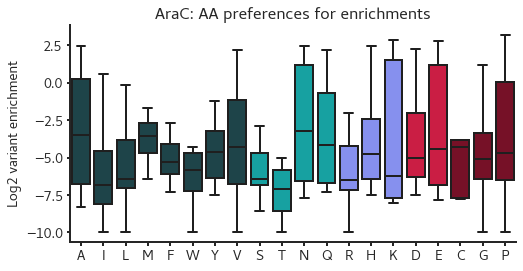

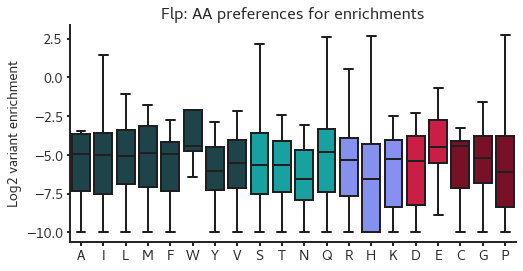

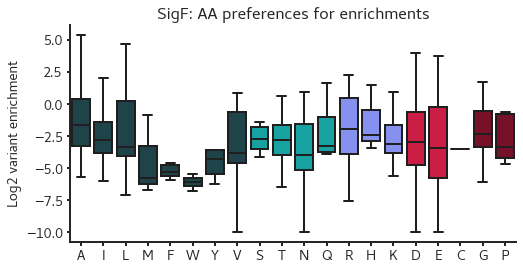

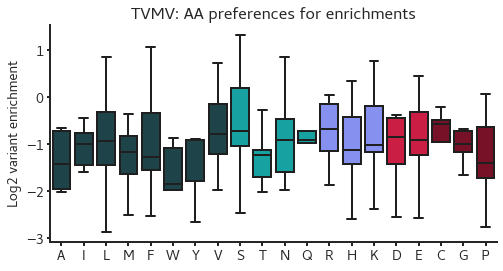

In [6]:
#import property dict
with open(f'{data_folder}/proteins_training.pickle', 'rb') as input:
    full_dataset = pickle.load(input)
input.close()

for key, item in full_dataset.items():
    sequence = [x for x in fasta_sequences[f"{key.split('_')[0]}_s"]]
    value = full_dataset[key]['2']['log'].copy()
    plt.figure(figsize=(8,4))
    AA_order = ['A','I','L','M','F','W','Y','V','S','T','N','Q','R','H','K','D','E','C','G','P']
    color_palette = ['#174950','#174950','#174950','#174950','#174950','#174950','#174950','#174950','#00B8B8','#00B8B8','#00B8B8','#00B8B8',
                    '#7582FF','#7582FF','#7582FF','#E60234','#E60234','#87001D','#87001D','#87001D','#87001D']
    ax = sns.boxplot(x=sequence, y=value, linewidth=2, order = AA_order, palette = color_palette, width=.8, showfliers = False)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_tick_params(width=2)
    ax.set_xlim(-.5)
    plt.ylabel("Log2 variant enrichment")
    sns.despine()
    plt.title(f"{key.split('_')[0]}: AA preferences for enrichments")
    plt.savefig(f"{fig_folder}/correlation_AA_{key}.svg", bbox_inches="tight")